<a href="https://colab.research.google.com/github/nachospimp/pf/blob/main/MachineLearningPredictionAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descargar e importar stock data.

Limpiar y visualizar la data.

Fijar Machine Learnig target.

Entrenar el modelo inicial.

Evaluar el error y crear backtest para medir adecuadamente el error por largos periodos de tiempo.

Mejorar el modelo con columnas extra de predicciones.

In [122]:
import yfinance as yf
import pandas as pd

In [123]:
sp500 = yf.Ticker('^GSPC')

In [124]:
sp500 = sp500.history(period='max')

In [125]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-06-05 00:00:00-04:00', '2024-06-06 00:00:00-04:00',
               '2024-06-07 00:00:00-04:00', '2024-06-10 00:00:00-04:00',
               '2024-06-11 00:00:00-04:00', '2024-06-12 00:00:00-04:00',
               '2024-06-13 00:00:00-04:00', '2024-06-14 00:00:00-04:00',
               '2024-06-17 00:00:00-04:00', '2024-06-18 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24232, freq=None)

<Axes: xlabel='Date'>

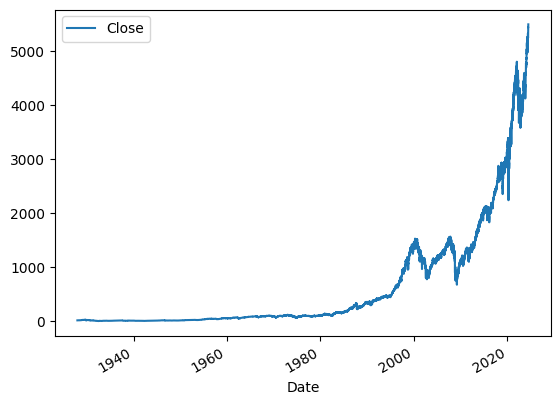

In [126]:
sp500.plot.line(y="Close", use_index=True)

In [127]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [128]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2024-06-12 00:00:00-04:00,5409.129883,5447.250000,5409.129883,5421.029785,3962840000
2024-06-13 00:00:00-04:00,5441.930176,5441.930176,5402.509766,5433.740234,3530380000
2024-06-14 00:00:00-04:00,5424.080078,5432.390137,5403.750000,5431.600098,3438650000


In [129]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [130]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-06-12 00:00:00-04:00,5409.129883,5447.250000,5409.129883,5421.029785,3962840000,5433.740234
2024-06-13 00:00:00-04:00,5441.930176,5441.930176,5402.509766,5433.740234,3530380000,5431.600098
2024-06-14 00:00:00-04:00,5424.080078,5432.390137,5403.750000,5431.600098,3438650000,5473.229980


In [131]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [132]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-06-12 00:00:00-04:00,5409.129883,5447.250000,5409.129883,5421.029785,3962840000,5433.740234,1
2024-06-13 00:00:00-04:00,5441.930176,5441.930176,5402.509766,5433.740234,3530380000,5431.600098,0
2024-06-14 00:00:00-04:00,5424.080078,5432.390137,5403.750000,5431.600098,3438650000,5473.229980,1


In [133]:
sp500 = sp500.loc["1990-01-01":].copy()

In [134]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-06-12 00:00:00-04:00,5409.129883,5447.250000,5409.129883,5421.029785,3962840000,5433.740234,1
2024-06-13 00:00:00-04:00,5441.930176,5441.930176,5402.509766,5433.740234,3530380000,5431.600098,0
2024-06-14 00:00:00-04:00,5424.080078,5432.390137,5403.750000,5431.600098,3438650000,5473.229980,1


In [135]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000,min_samples_split=100,random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Open", "High", "Low", "Volume"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=1000, random_state=1)

In [136]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [137]:
preds = pd.Series(preds, index=test.index)

In [138]:
precision_score(test["Target"], preds)

0.49019607843137253

In [139]:
preds

Date
2024-01-26 00:00:00-05:00    0
2024-01-29 00:00:00-05:00    1
2024-01-30 00:00:00-05:00    0
2024-01-31 00:00:00-05:00    0
2024-02-01 00:00:00-05:00    1
                            ..
2024-06-12 00:00:00-04:00    1
2024-06-13 00:00:00-04:00    1
2024-06-14 00:00:00-04:00    0
2024-06-17 00:00:00-04:00    0
2024-06-18 00:00:00-04:00    1
Length: 100, dtype: int64

In [140]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

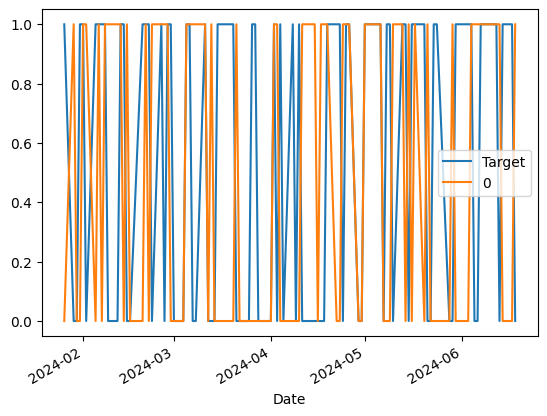

In [141]:
combined.plot()

In [142]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined


In [143]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [ ]:
predictions = backtest(sp500, model, predictors)

In [ ]:
predictions["Predictions"].value_counts()

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

In [ ]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    new_predictors += [ratio_column, trend_column]



In [ ]:
sp500 = sp500.dropna()

In [ ]:
sp500

In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
predictions = backtest(sp500, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])